In [1]:
cd ../../..

/hpi/fs00/home/tim.garrels/masterthesis


In [2]:
pwd

'/hpi/fs00/home/tim.garrels/masterthesis'

In [3]:
from pathlib import Path

DATASET_BASE_PATH = Path("./datasets/")
OUT_BASE_PATH = Path("./output/")

ANALYSIS_CANDIDATES = {
    "yeast": {
        "edgelist": DATASET_BASE_PATH /  "yeastInter_st.txt",
        "outpath": OUT_BASE_PATH / "yeastInter_st",
    },
}

In [4]:
CANDIDATE = "yeast"

GRAPH_EDGELIST = ANALYSIS_CANDIDATES[CANDIDATE]["edgelist"]
OUT = ANALYSIS_CANDIDATES[CANDIDATE]["outpath"]
GRAPHLET_SIZE = 4

In [5]:
# Retrieve Graphlets and their metrics
from pmotifs.PMotifGraph import PMotifGraph


g = PMotifGraph(GRAPH_EDGELIST, OUT)

In [6]:
g_p = g.load_graphlet_pos_zip(GRAPHLET_SIZE)

In [7]:
g_pm = g.load_positional_data(GRAPHLET_SIZE)

Loading Graphlet Metrics: 100%|████████████████| 16694356/16694356 [03:01<00:00, 92171.98it/s]


In [8]:
graphlet_lookup = dict(zip(g_p, g_pm.graphlet_metrics))

In [9]:
# Analysis by frequency does not make sense in local scope, all graphlet occurrences account to only one score
graphlet_frequencies = g.load_graphlet_freq_file(GRAPHLET_SIZE)
graphlet_frequencies

{'0111 1000 1000 1000': 16444931,
 '0110 1001 1000 0100': 131598,
 '0111 1010 1100 1000': 116800,
 '0111 1011 1100 1100': 772,
 '0110 1001 1001 0110': 252,
 '0111 1011 1101 1110': 3}

In [10]:
graphlet_classes = {k.graphlet_class for k in g_p}
graphlet_classes

{'0110 1001 1000 0100',
 '0110 1001 1001 0110',
 '0111 1000 1000 1000',
 '0111 1010 1100 1000',
 '0111 1011 1100 1100',
 '0111 1011 1101 1110'}

# Analysis

In [11]:
from typing import Union

from pmotifs.GraphletPositionalMetrics import GraphletPositionalMetrics


def get_pos_metric_name():
    return "degree"

def get_positional_metric(pm: GraphletPositionalMetrics) -> Union[int, float]:
    """A wrapper to consolidate metrics
    In the case of this example, motif degree does not need to be consolidated"""
    return pm["degree"]

In [12]:
import pandas as pd

df = pd.DataFrame([
    {"graphlet_class": g_oc.graphlet_class, get_pos_metric_name(): get_positional_metric(g_pm)}
    for g_oc, g_pm in graphlet_lookup.items()
])

df.head()

,graphlet_class,degree
0,0110 1001 1000 0100,32
1,0110 1001 1000 0100,16
2,0110 1001 1000 0100,19
3,0110 1001 1000 0100,38
4,0110 1001 1000 0100,21


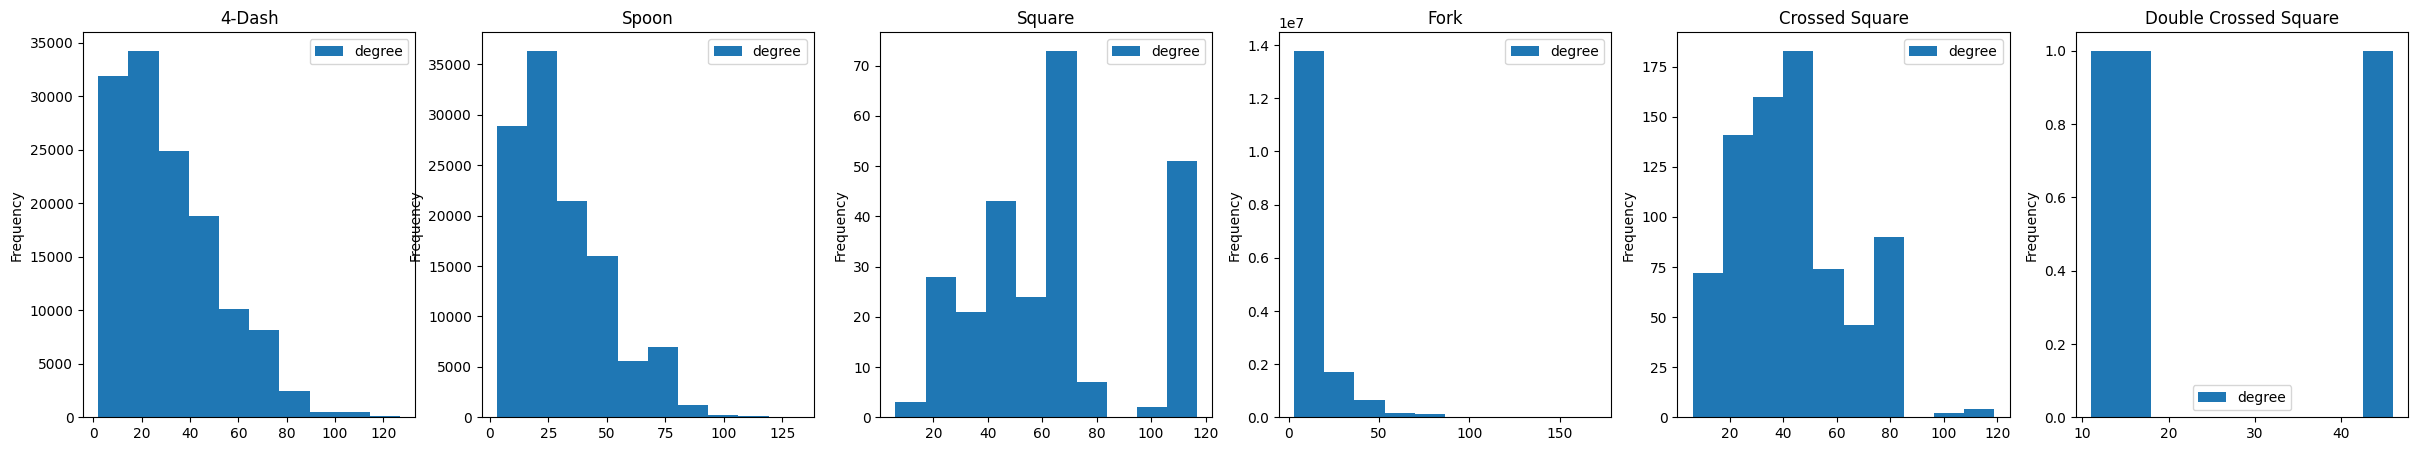

In [13]:
import matplotlib.pyplot as plt

from pmotifs.graphlet_representation import graphlet_class_to_name


fig, axes = plt.subplots(1, len(graphlet_classes), figsize=(len(graphlet_classes) * 5, 5))

for i, graphlet_class in enumerate(graphlet_classes):
    ax = axes[i]
    df[df["graphlet_class"] == graphlet_class].plot.hist(ax=ax)
    ax.set_title(graphlet_class_to_name(graphlet_class))

Text(0.5, 1.0, 'degree Histogram of all 4-Graphlets')

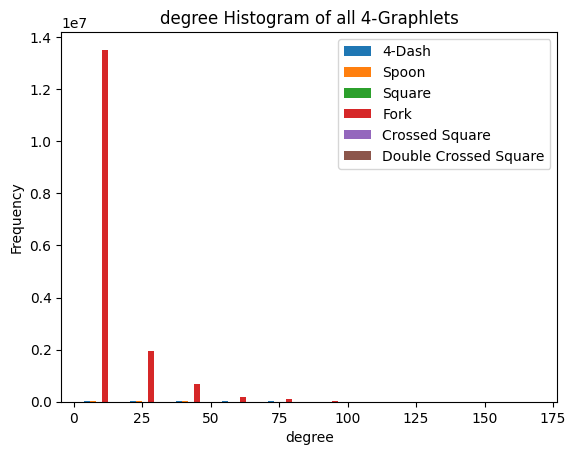

In [14]:
import matplotlib.pyplot as plt

from pmotifs.graphlet_representation import graphlet_class_to_name


fig, ax = plt.subplots(1, 1)

x = [
    df[df["graphlet_class"] == graphlet_class]["degree"]
    for graphlet_class in graphlet_classes
]

ax.hist(x, label=[graphlet_class_to_name(graphlet_class) for graphlet_class in graphlet_classes])
ax.legend()
ax.set_xlabel(get_pos_metric_name())
ax.set_ylabel("Frequency")
ax.set_title(f"{get_pos_metric_name()} Histogram of all {GRAPHLET_SIZE}-Graphlets")

TODO: Which statistical tests would be appropriate here to determine the prevalency of one graphlet class over the other? Or is the plot sufficient?